# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
data = data.replace(np.nan, '', regex= True)
data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split # пересоздаем выборки без пропусков

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [ ]:
a = train.groupby('target')['id'].count()
print("True: {:.2f}%".format(a[1]/a.sum() * 100))
print("False: {:.2f}%".format(a[0]/a.sum() * 100))

True: 43.25%
False: 56.75%


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [ ]:
a = train.groupby('keyword')['id'].count().sort_values(ascending = [False])
popular_keywords = a[1:10]

<ipython-input-24-c0fc726f901e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  true = false = train.groupby('keyword')['target', 'c'].sum().sort_values(by='c' ,ascending = [False])[1:10]


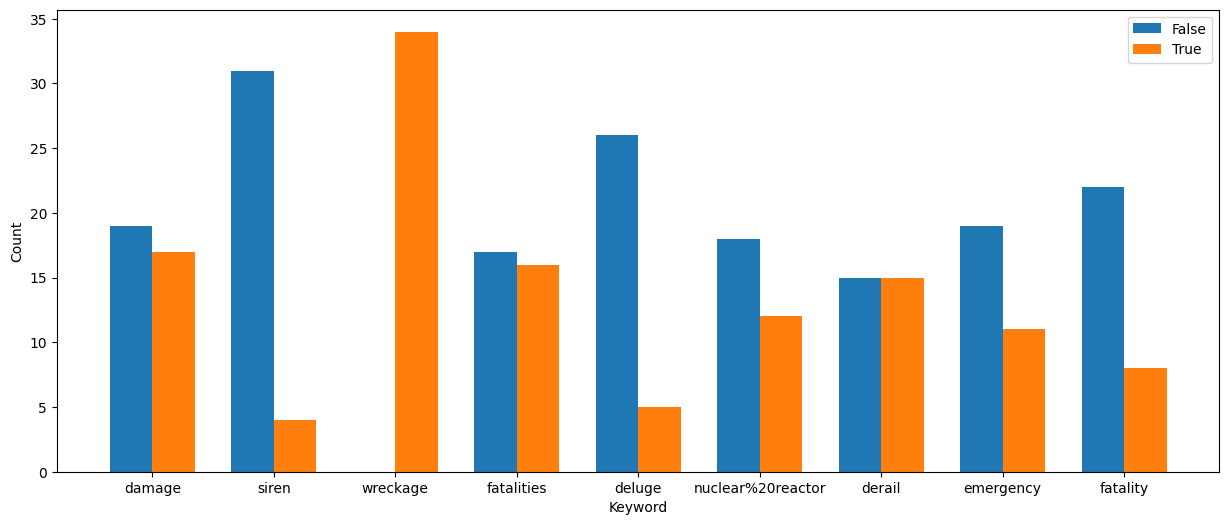

In [ ]:
train.insert(loc= 0 , column='c', value=1)
labels = popular_keywords.index
true = false = train.groupby('keyword')['target', 'c'].sum().sort_values(by='c' ,ascending = [False])[1:10]
false = popular_keywords-true.target
train.drop(columns='c', axis= 1, inplace=True)

# Задание ширины столбцов
bar_width = 0.35

# Создание объекта Figure и Axes
fig, ax = plt.subplots(figsize=(15,6))

# Построение столбцов для первого ряда
bar1 = ax.bar(np.arange(len(labels)), false, bar_width, label='False')

# Построение столбцов для второго ряда
bar2 = ax.bar(np.arange(len(labels)) + bar_width, true.target, bar_width, label='True')

# Настройка осей и заголовка
ax.set_xlabel('Keyword')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(labels)) + bar_width / 2)
ax.set_xticklabels(labels)

# Добавление легенды
ax.legend()

# Отображение столбчатой диаграммы
plt.show()

**Выводы**: тут можно выделить слова, которые являются неплохими маркерами (siren, wreckage, deluge) и слова которые скорее не влияют на ответ (damage, fatalities, derail)

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [ ]:
train_new = train
train_new['text'] = train_new['keyword'] + ' ' + train_new['location'] + ' ' + train_new['text']
train_new = train_new.drop(['keyword', 'location', 'id'], axis=1)

In [ ]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data.text)
X.shape

(7613, 21637)

In [ ]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
dictionary = vectorizer.vocabulary_

In [ ]:
import re
import string

def contains_digit(s: str) -> bool:
    s = str(s.split())
    words_with_numbers = re.findall(r'\b\w*\d\w*\b', s)
    return words_with_numbers

def contains_punctuation(s: str) -> bool:
    count = 0
    s = list(s.split())
    for word in s:
        for char in string.punctuation:
            if char in word:
                count += 1
                break
    return count

def is_hashtag(s: str) -> bool:
    words = str(s.split())
    pattern = r'#\w+'
    hashtags = re.findall(pattern, words)
    return hashtags

def is_mention(s: str) -> bool:
    words = str(s.split()) 
    pattern = r'@\w+'
    mentions = re.findall(pattern, words)
    return mentions

def investigate_vocabulary(vocabulary):

    words = list(vocabulary.keys())
    text = ' '.join(words)
    # rint(contains_punctuation(text))
    print('With digit:      ', len(contains_digit(text)))
    print('With punctuation:', contains_punctuation(text))
    print('Hashtags:        ', len(is_hashtag(text)))
    print('Mentions:        ', len(is_mention(text)))

In [ ]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [ ]:
investigate_vocabulary(dictionary)

With digit:       1024
With punctuation: 3293
Hashtags:         1881
Mentions:         437


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [ ]:
tokenizer = TweetTokenizer()
Tvectorizer = CountVectorizer(tokenizer=TweetTokenizer().tokenize, analyzer='word')

T = Tvectorizer.fit_transform(data.text)
T.shape
T_dict = vectorizer.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
investigate_vocabulary(T_dict)

With digit:       1024
With punctuation: 3293
Hashtags:         1881
Mentions:         437


**Сравнение:** Ну... они дали один результат 

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [ ]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

def contains_only_latin_letters(s: str) -> bool:
    pattern = r'^[a-z]+$'
    return bool(re.match(pattern, s))

def is_emoji(s: str) -> bool:
    pattern = r'^[^\w\s]+\)?$'
    return bool(re.match(pattern, s))

def is_hashtag(s: str) -> bool:
    if len(s) > 1 and s[0] == '#':
        return True
    else:
        return False

def custom_tokenizer(s: str) -> List[str]:    
    s = str(s).lower()
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(s)
    for token in tokens:
      if 0 == sum([contains_only_latin_letters(token), 
                                is_emoji(token), 
                                is_hashtag(token)]) and token not in nltk.corpus.stopwords.words('english'):
                                tokens.remove(token)
    stemmer = SnowballStemmer("english")
    stemmed_tokens = [stemmer.stem(w) for w in tokens]
    return(stemmed_tokens)
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
custom_tokenizer('She LOVES painting :-) #art')

['she', 'love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
for i in range(10): print(custom_tokenizer(data.text[i]))

['our', 'deed', 'are', 'the', 'reason', 'of', 'this', '#earthquak', 'may', 'allah', 'forgiv', 'us', 'all']
['forest', 'fire', 'near', 'la', 'rong', 'sask', '.', 'canada']
['all', 'resid', 'ask', 'to', "'", 'shelter', 'in', 'place', "'", 'are', 'be', 'notifi', 'by', 'offic', '.', 'no', 'other', 'evacu', 'or', 'shelter', 'in', 'place', 'order', 'are', 'expect']
['peopl', 'receiv', '#wildfir', 'evacu', 'order', 'in', 'california']
['just', 'got', 'sent', 'this', 'photo', 'from', 'rubi', '#alaska', 'as', 'smoke', 'from', '#wildfir', 'pour', 'into', 'a', 'school']
['#rockyfir', 'updat', '=', '>', 'california', 'hwi', '.', 'close', 'in', 'both', 'direct', 'due', 'to', 'lake', 'counti', 'fire', '-', '#cafir', '#wildfir']
['#flood', '#disast', 'heavi', 'rain', 'caus', 'flash', 'flood', 'of', 'street', 'in', 'manitou', ',', 'colorado', 'spring', 'area']
['on', 'top', 'of', 'the', 'hill', 'and', 'i', 'can', 'see', 'a', 'fire', 'in', 'the', 'wood', '...']
['an', 'emerg', 'evacu', 'happen', 'now',

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [ ]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
text = vectorizer.fit_transform(data.text)
# X_test = vectorizer.fit_transform(test.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
Y_train = train.target
Y_test = test.target

2. Обучите LogisticRegression на полученных признаках.


In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, train.target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, lg.predict(X_test)))
# X_train.shape, X_test.shape

0.7653508771929824


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
lg.fit(X_train, train.target)
print(text.shape, '\n', f1_score(Y_test, lg.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 13077) 
 0.7507196315486471


1. **Ответ:** тф-идф плох (в данном случае)

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [ ]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.09)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
lg.fit(X_train, train.target)
print(text.shape, '\n', f1_score(Y_test, lg.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 13059) 
 0.751458576429405


2. **Ответ:** ну тут чуть-чуть лучше :)), убрали лишнее

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.09, min_df=0.0006)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
lg.fit(X_train, train.target)
print(text.shape, '\n', f1_score(Y_test, lg.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 2470) 
 0.7627118644067797


3. **Ответ:** а вот тут прям нормик сработали, опять убрали лишнего

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
lg.fit(X_train, train.target)
print(text.shape, '\n', f1_score(Y_test, lg.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 5000) 
 0.7259425998874508


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** вообще чистый CountVectorizer выдал наилучшую метрику

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [ ]:
#ну я 0.773 на логрег сделал :)))
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_df=0.9, min_df=0.0006)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)
lg.fit(X_train, train.target)
print(text.shape, '\n', f1_score(Y_test, lg.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7613, 2488) 
 0.7726775956284153


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import GridSearchCV #устроим перебор параметров

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.09, min_df=0.0006)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)

param_grid = {'C':[1.15]}
grid_search = GridSearchCV(LogisticRegression(solver = 'saga', 
                                              class_weight = 'balanced', 
                                              tol = 0.12,
                                              penalty = 'l2', 
                                              C=1, 
                                              random_state = 42), param_grid, cv=5)
grid_search.fit(X_train, train.target)

print("F1-score: ", f1_score(Y_test, grid_search.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1-score:  0.7710594315245478


логрег дал 0.77 показатель
ниже пробовал бустинг, базированный градиентный и категориальный.(по обоим перебирались бараметры) Буду благодарен за комментарий, почему не получилось обыграть логрег

# бустинг

In [ ]:
# !pip install catboost
from catboost import CatBoostClassifier

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)

param_grid = {
    'learning_rate': [0.1],
    'depth': [3]
}
grid_search = GridSearchCV(CatBoostClassifier(), param_grid, scoring=f1_score, cv=5)
grid_search.fit(X_train, train.target)

print("Best parameters: ", grid_search.best_params_)
print("F1-score: ", f1_score(Y_test, grid_search.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0:	learn: 0.6841664	total: 21.7ms	remaining: 21.7s
1:	learn: 0.6754645	total: 40.7ms	remaining: 20.3s
2:	learn: 0.6684059	total: 59.7ms	remaining: 19.8s
3:	learn: 0.6633034	total: 78.9ms	remaining: 19.6s
4:	learn: 0.6572402	total: 97.9ms	remaining: 19.5s
5:	learn: 0.6525764	total: 117ms	remaining: 19.4s
6:	learn: 0.6469820	total: 136ms	remaining: 19.4s
7:	learn: 0.6420863	total: 155ms	remaining: 19.2s
8:	learn: 0.6382202	total: 174ms	remaining: 19.2s
9:	learn: 0.6334721	total: 193ms	remaining: 19.1s
10:	learn: 0.6302928	total: 213ms	remaining: 19.2s
11:	learn: 0.6277434	total: 237ms	remaining: 19.5s
12:	learn: 0.6242690	total: 256ms	remaining: 19.4s
13:	learn: 0.6213986	total: 276ms	remaining: 19.5s
14:	learn: 0.6188462	total: 295ms	remaining: 19.4s
15:	learn: 0.6162731	total: 314ms	remaining: 19.3s
16:	learn: 0.6139300	total: 332ms	remaining: 19.2s
17:	learn: 0.6117356	total: 351ms	remaining: 19.2s
18:	learn: 0.6086269	total: 370ms	remaining: 19.1s
19:	learn: 0.6056549	total: 388ms	re

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: f1_score() takes 2 positional arguments but 3 were given

  warnings.warn(


Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.6841736	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6768065	total: 38.6ms	remaining: 19.2s
2:	learn: 0.6694197	total: 57.7ms	remaining: 19.2s
3:	learn: 0.6613387	total: 76.5ms	remaining: 19s
4:	learn: 0.6561270	total: 95.4ms	remaining: 19s
5:	learn: 0.6526326	total: 114ms	remaining: 18.9s
6:	learn: 0.6477579	total: 133ms	remaining: 18.8s
7:	learn: 0.6435252	total: 151ms	remaining: 18.8s
8:	learn: 0.6393232	total: 170ms	remaining: 18.7s
9:	learn: 0.6357715	total: 189ms	remaining: 18.8s
10:	learn: 0.6327606	total: 208ms	remaining: 18.7s
11:	learn: 0.6294471	total: 233ms	remaining: 19.2s
12:	learn: 0.6270870	total: 253ms	remaining: 19.2s
13:	learn: 0.6237832	total: 272ms	remaining: 19.1s
14:	learn: 0.6211588	total: 290ms	remaining: 19.1s
15:	learn: 0.6186537	total: 309ms	remaining: 19s
16:	learn: 0.6154652	total: 327ms	remaining: 18.9s
17:	learn: 0.6134551	total: 348ms	remaining: 19s
18:	learn: 0.6113124	total:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


0:	learn: 0.6847171	total: 23.4ms	remaining: 23.4s
1:	learn: 0.6768489	total: 45.8ms	remaining: 22.8s
2:	learn: 0.6713892	total: 68.1ms	remaining: 22.6s
3:	learn: 0.6646475	total: 90.2ms	remaining: 22.5s
4:	learn: 0.6583181	total: 112ms	remaining: 22.3s
5:	learn: 0.6535559	total: 134ms	remaining: 22.2s
6:	learn: 0.6486380	total: 156ms	remaining: 22.2s
7:	learn: 0.6432497	total: 179ms	remaining: 22.2s
8:	learn: 0.6399468	total: 202ms	remaining: 22.3s
9:	learn: 0.6367917	total: 234ms	remaining: 23.2s
10:	learn: 0.6326567	total: 262ms	remaining: 23.5s
11:	learn: 0.6293792	total: 284ms	remaining: 23.4s
12:	learn: 0.6256064	total: 306ms	remaining: 23.2s
13:	learn: 0.6228364	total: 328ms	remaining: 23.1s
14:	learn: 0.6196651	total: 350ms	remaining: 23s
15:	learn: 0.6171845	total: 373ms	remaining: 22.9s
16:	learn: 0.6154180	total: 395ms	remaining: 22.8s
17:	learn: 0.6129970	total: 418ms	remaining: 22.8s
18:	learn: 0.6109499	total: 448ms	remaining: 23.1s
19:	learn: 0.6084013	total: 475ms	remai

In [ ]:
print("Best F1-score:", grid_search.best_score_)

F1-score:  0.7353105763850027


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.09, min_df=0.0006)
text = vectorizer.fit_transform(data.text)
X_train, X_test = train_test_split(text, test_size=0.3, random_state=42)

# Подбор параметров модели
param_grid = {
    'learning_rate': [0.05],
    'n_estimators': [1000],
    'max_depth': [5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, train.target)

# Вывод лучших параметров и соответствующей F1-меры
print("Best parameters: ", grid_search.best_params_)
print("F1-score: ", f1_score(Y_test, grid_search.predict(X_test)))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Best parameters:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 700}
F1-score:  0.722755505364201
